### Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
raw_data = pd.read_csv("fetal_health.csv")

#creating deep copy
data = raw_data.copy(deep=True)

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data = data.rename(columns={"baseline value": "baseline_value"})

In [5]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [7]:
data.nunique()

baseline_value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [8]:
print(data['fetal_health'].unique())
print(data['histogram_tendency'].unique())
print(data['severe_decelerations'].unique())

[2. 1. 3.]
[ 1.  0. -1.]
[0.    0.001]


## Data Visualization

Data visualizations of "fetal_health" column makes easier to understand the fetal state, and visualization also makes it easier to detect patterns of the fetal state (Normal, Suspect, Pathological).

Text(0.5, 1.0, 'Count plot of Fetal Heath')

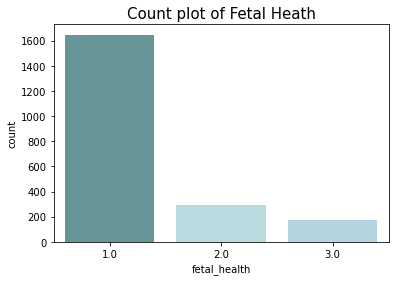

In [9]:
#evaluate the target variable and find out if our data is imbalanced or not

colours=["#5F9EA0", "#B0E0E6", "#ADD8E6"]
sns.countplot(data= data, x="fetal_health",palette=colours)
plt.title('Count plot of Fetal Heath', fontsize = 15)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy.

In [10]:
data["fetal_health"].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

Text(0.5, 1.0, 'Pie chart of Fetal Heath')

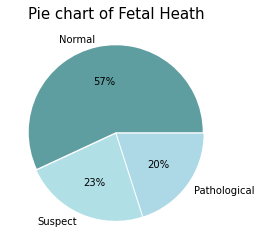

In [11]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"],explode=[0.01,0.01,0.01], autopct="%1.0f%%")
plt.title('Pie chart of Fetal Heath', fontsize = 15)

In [12]:
#data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

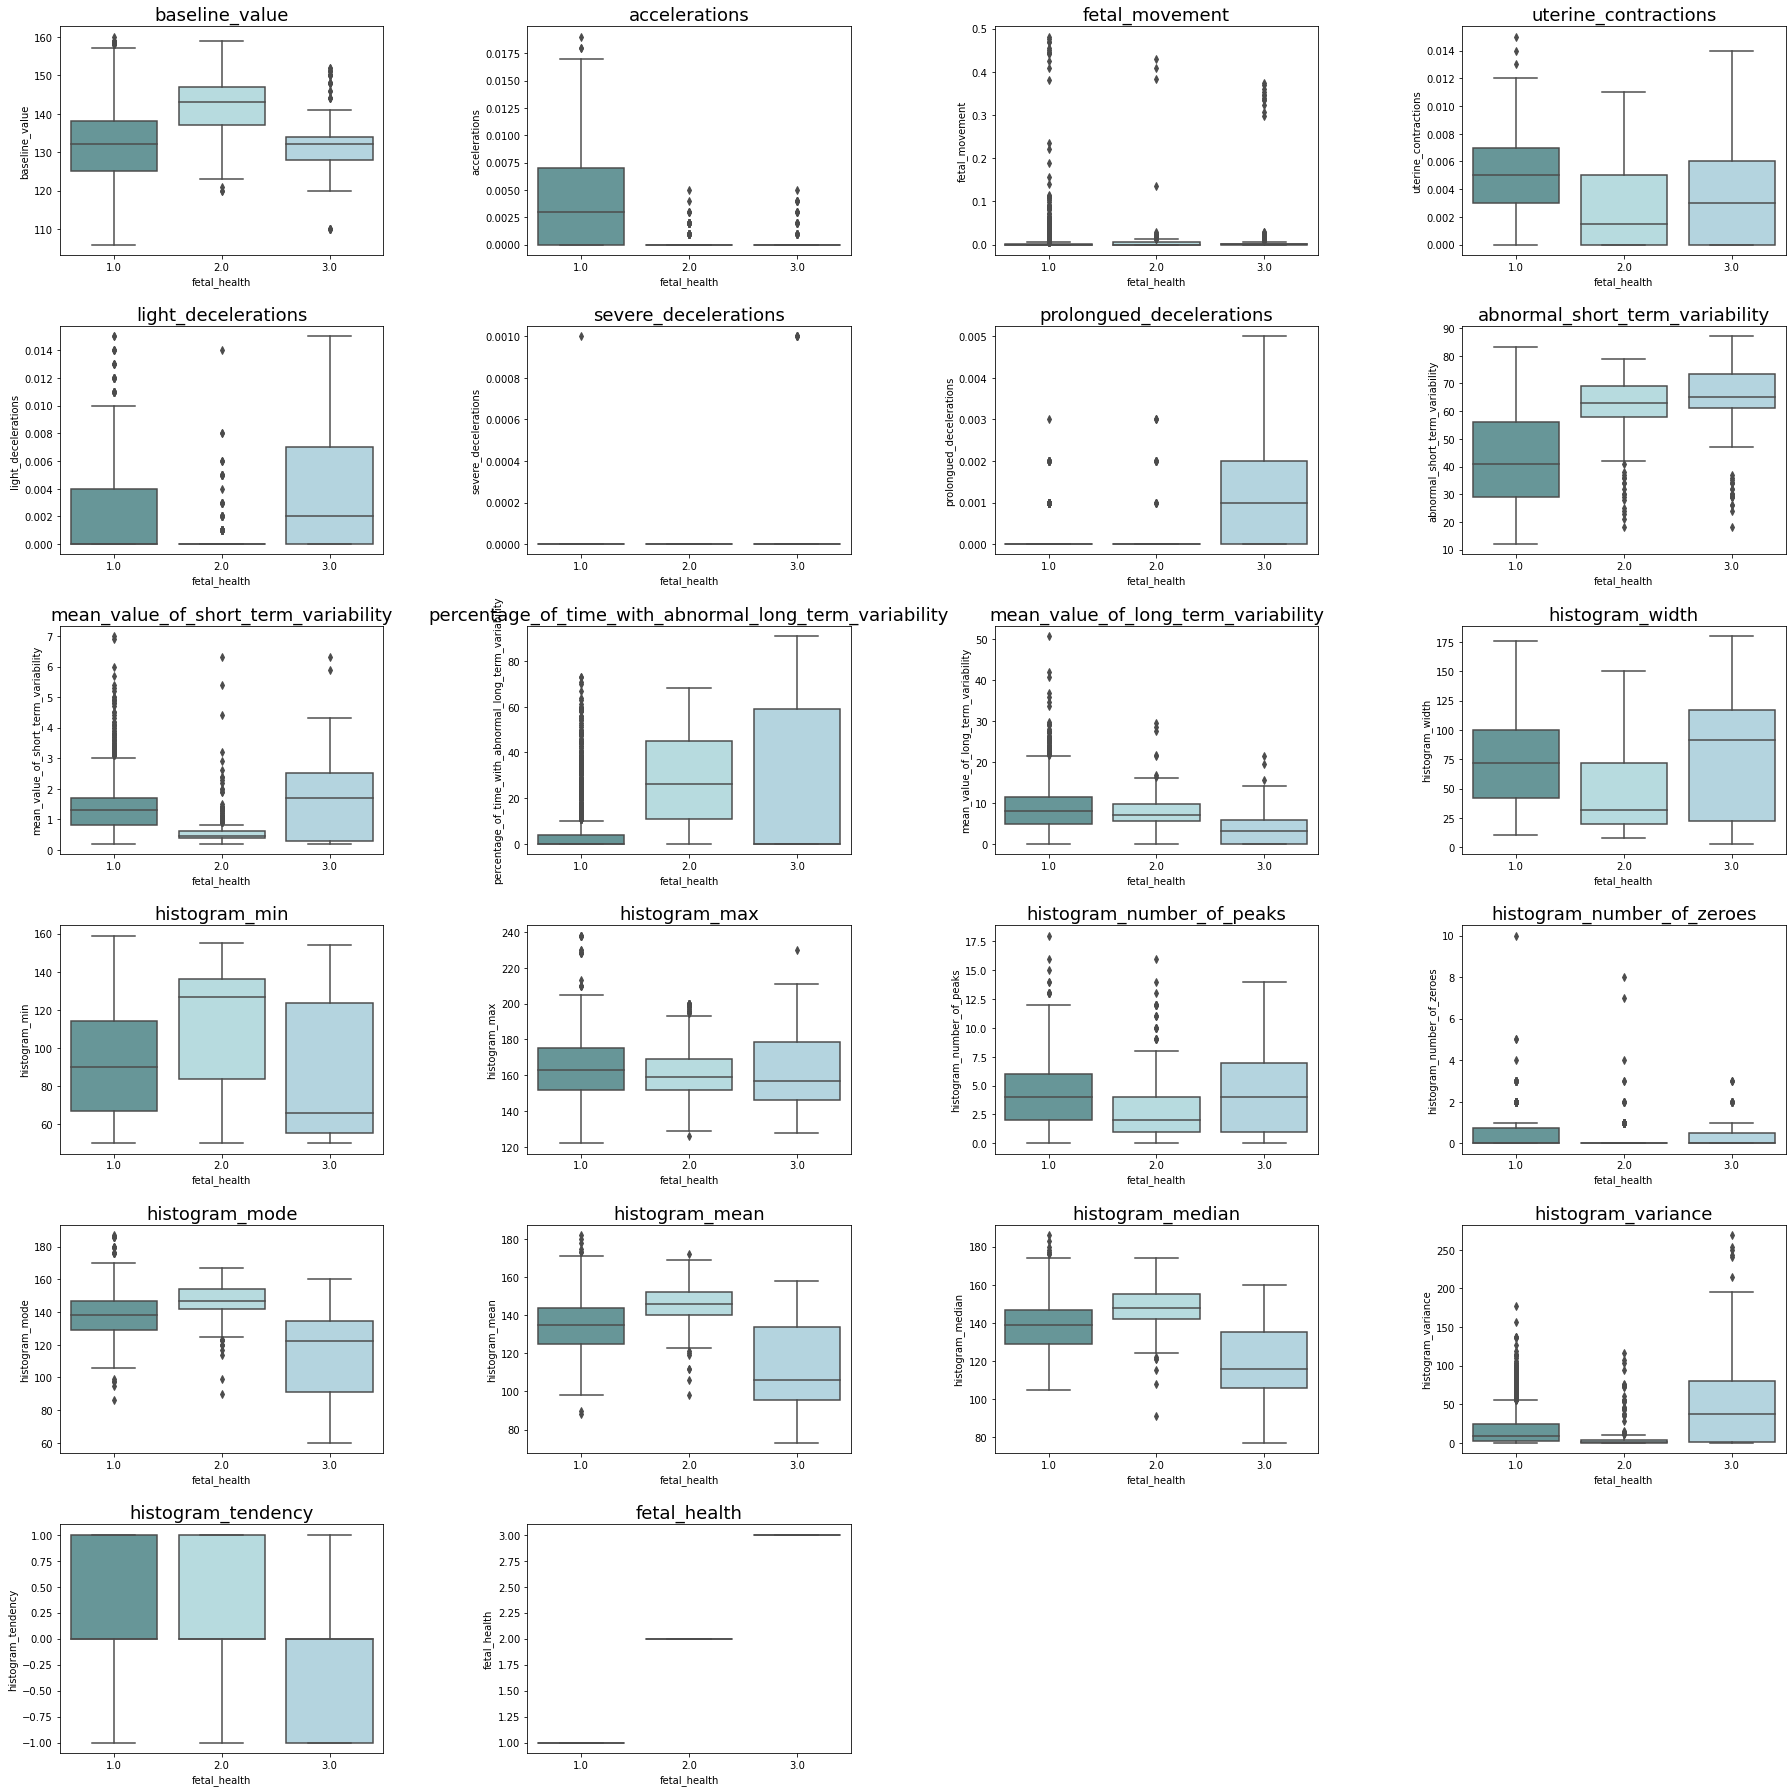

In [13]:
shades =["#5F9EA0", "#B0E0E6", "#ADD8E6"]

plt.figure(figsize=(25,25))
i=1
for col in data.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x = 'fetal_health', y = col, data = data, palette = shades)
    plt.tight_layout()
    plt.title(col,fontsize=18)
    i+=1

#### Inference:


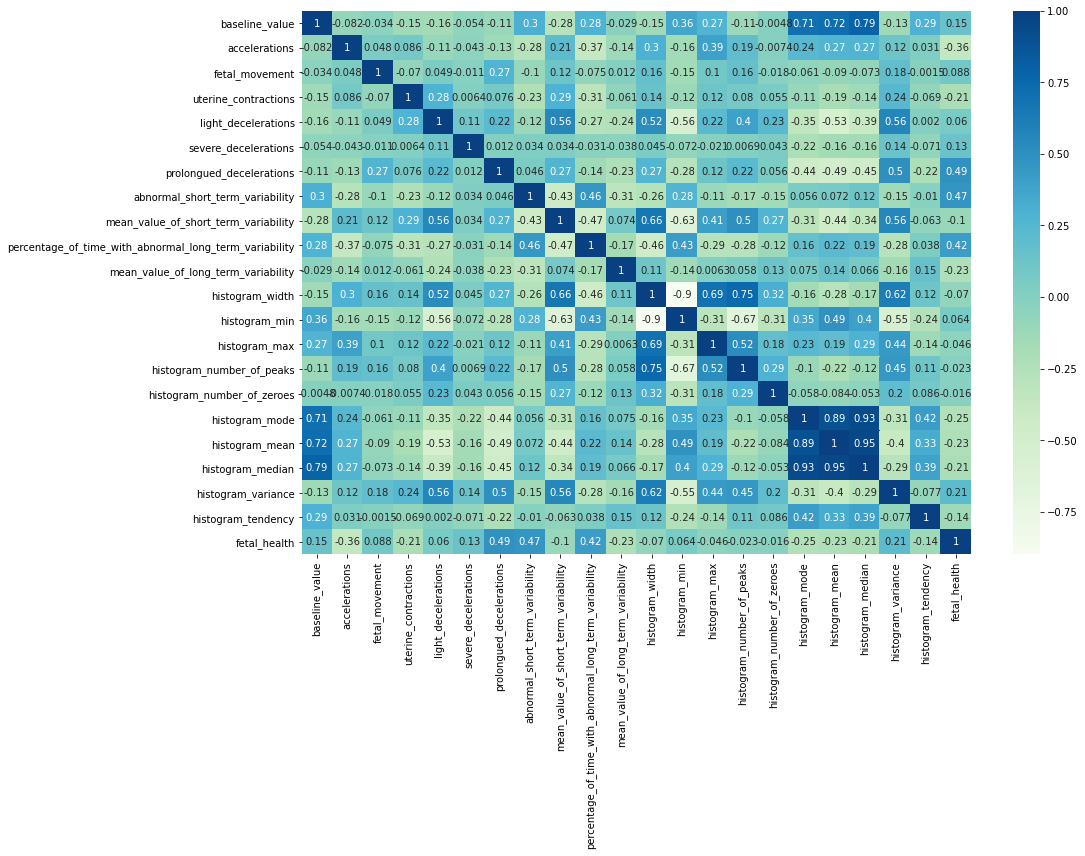

In [14]:
#correlation matrix

corrmat= data.corr()
plt.figure(figsize=(15,10))  
#cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap='GnBu')                              #RdYlGn

#### Inference:
    'histogram_mean' , 'histogram_mode' , 'histogram_median' features are highly positively correlated with each other
    whereas 'histogram_width' and 'histogram_min' features are highly negatively correlated with each other.
    These features will lead to the problem of multicollinearity, we should consider this problem while using
    our models whereas in ensemble methods like Random forest this multicollinearity won't effect much.

In [15]:
data.drop(['histogram_mean' , 'histogram_median', 'histogram_width'], axis=1, inplace=True)

In [16]:
#Correlation of Target variable with independent variables
Tar_corr = data.corr()["fetal_health"].sort_values(ascending=False).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Tar_corr.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.486752
abnormal_short_term_variability,0.469671
percentage_of_time_with_abnormal_long_term_variability,0.421634
histogram_variance,0.208171
baseline_value,0.146077
severe_decelerations,0.132408
fetal_movement,0.088057
histogram_min,0.063529
light_decelerations,0.059651


#### Inference:
    It is clear that "prolongued_decelerations", "abnormal_short_term_variability",
    "percentage_of_time_with_abnormal_long_term_variability" have higher correlation with target column "fetal_health".

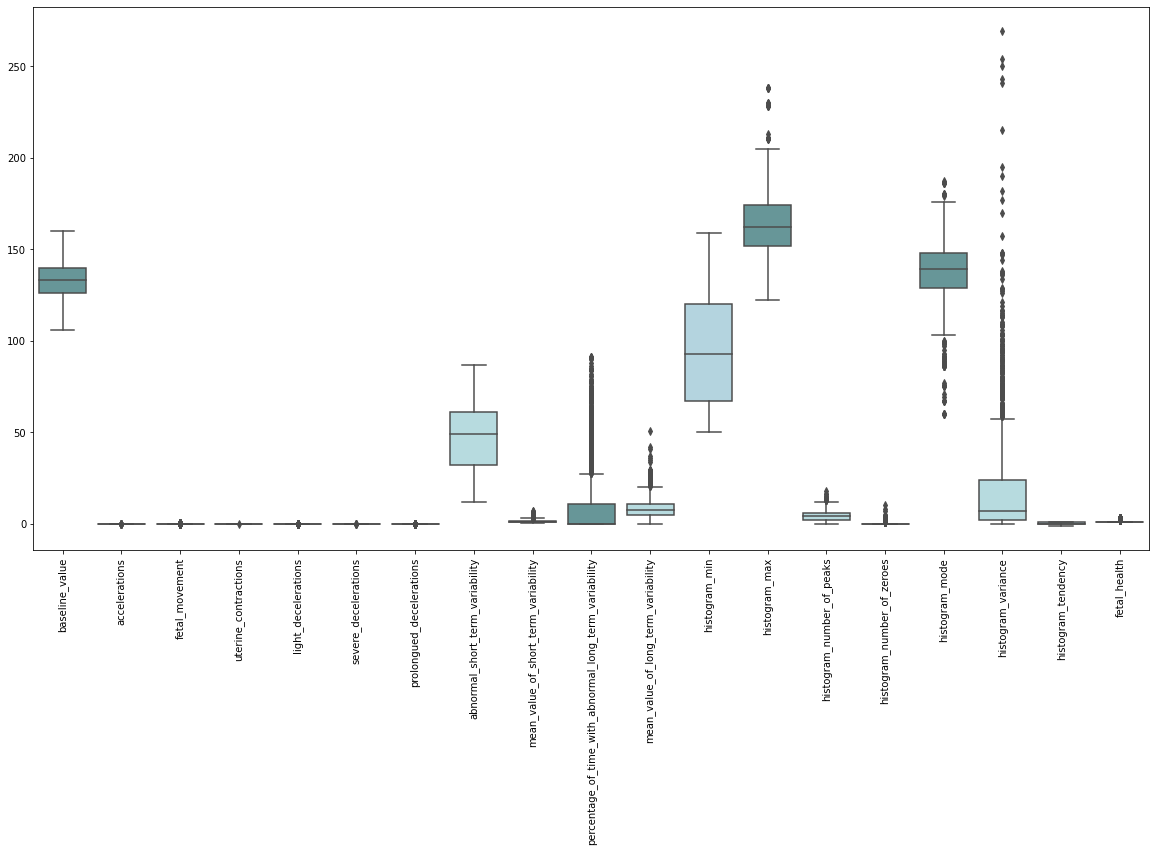

In [17]:
shades =["#5F9EA0", "#B0E0E6", "#ADD8E6"]
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

#### Inference:
    The above plot shows the range of our feature attributes. All the features are in different ranges. 
    To fit this in a model we must scale it to the same range.
    In the model building, we will preprocess the features to do the same.
    
    Also,
    There are some outliers in dataset
    However, it is not quite a good idea to remove them yet as it may lead to data loss as there is class imbalance.
    Though we may end up with better statistics.
    A basic rule of thumb for the outliers in question is:
    "It is a measurement error or data entry error, correct the error if possible. 
    If you can’t fix it, remove that observation.
    In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error.
    If it is not a part of the population you are studying, you can legitimately remove the outlier. 
    In this case, this all is about the fetus, and experts tag the classification. Let's stick with the expert opinion."
    Thus assuming that these are the natural part of the population we are studying, we should not remove it.

In [18]:
#assigning values to features as X and target as y
y=data.pop("fetal_health")
X=data

#### Scaling features

In [19]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)

X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2113.0,-5.880031e-16,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,9.678328e-17,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
fetal_movement,2113.0,-8.588072e-16,1.000237,-0.203392,-0.203392,-0.203392,-0.139280,10.075993
uterine_contractions,2113.0,-1.629763e-15,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-6.120886e-15,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-5.337596e-16,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,2.528818e-15,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,6.567812e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-3.913365e-16,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.212985e-15,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504


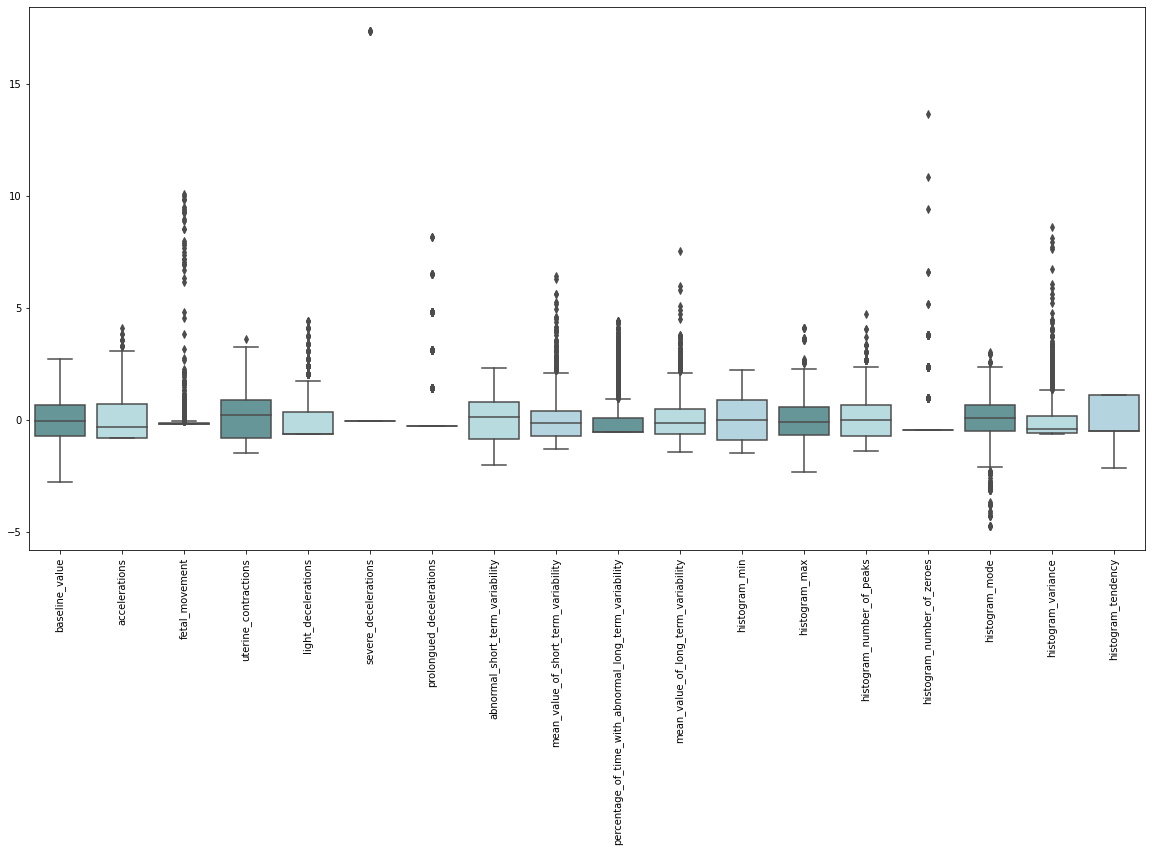

In [20]:
#looking at the scaled features
shades=["#5F9EA0", "#B0E0E6", "#ADD8E6"]      #shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [21]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42,stratify=y)
#Checking the shapes
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (1479, 18)
y_train shape : (1479,)
X_test shape : (634, 18)
y_test shape : (634,)


#### Building Machine Learning Models:
- Logistic Regression (LR)
- K-nearest neighbors (KNN)
- SVC
- Decision Tree
- Random Forest (RF)

In [22]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_knn=Pipeline([ ('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_knn, pipeline_svc, pipeline_dt, pipeline_rf]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1:"KNN" , 2: "SVC", 3: 'Decision Tree', 4: 'RandomForest'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)


In [23]:
#cross validation on accuracy 
print('\033[1m' + 'Training accuracy of different models:' + '\033[0m')
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s : %f " % (pipe_dict[i], cv_score.mean()))

Training accuracy of different models:
Logistic Regression : 0.888431 
KNN : 0.892480 
SVC : 0.906665 
Decision Tree : 0.910737 
RandomForest : 0.935756 


In [24]:
#Test accuracy of different models
print('\033[1m' + 'Test accuracy of different models:' + '\033[0m')
for i, model in enumerate(pipelines):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("%s : %f " % (pipe_dict[i], accuracy))

Test accuracy of different models:
Logistic Regression : 0.891167 
KNN : 0.897476 
SVC : 0.905363 
Decision Tree : 0.903785 
RandomForest : 0.930599 


In [25]:
#Classififcation report of different models

for i, model in enumerate(pipelines):
    print("\r\n" + '\033[1m' + 'Confusion Matrix & Classififcation report of %s:' % pipe_dict[i] + '\033[0m' + "\r\n")
    pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\r\n")
    print(classification_report(y_test, pred))


Confusion Matrix & Classififcation report of Logistic Regression:

Confusion Matrix:
[[472  21   1]
 [ 32  53   3]
 [  3   9  40]]


              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       494
         2.0       0.64      0.60      0.62        88
         3.0       0.91      0.77      0.83        52

    accuracy                           0.89       634
   macro avg       0.83      0.78      0.80       634
weighted avg       0.89      0.89      0.89       634


Confusion Matrix & Classififcation report of KNN:

Confusion Matrix:
[[476  16   2]
 [ 33  55   0]
 [  6   8  38]]


              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       494
         2.0       0.70      0.62      0.66        88
         3.0       0.95      0.73      0.83        52

    accuracy                           0.90       634
   macro avg       0.86      0.77      0.81       634
weighted avg       0.89      0.90      0.

#### Inference:

#### Grid Search

 Let us build a better random forest with grid search cv. Let's find out how it performs on testset

In [26]:
#Building a dictionary with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150],
    'max_features': ['auto'],
    'max_depth' : [4,6,8,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': None}

In [27]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.943217665615142

In [28]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.943217665615142
Recall      :  0.943217665615142
Precision   :  0.9415452750299329
F1 Score    :  0.943217665615142


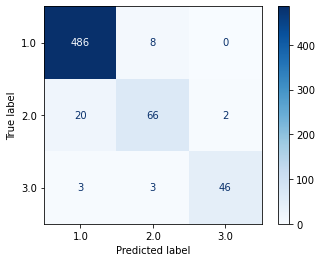

In [30]:
plot_confusion_matrix(RF_model
                      , X_test, y_test, cmap='Blues')

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       494
         2.0       0.86      0.75      0.80        88
         3.0       0.96      0.88      0.92        52

    accuracy                           0.94       634
   macro avg       0.92      0.87      0.90       634
weighted avg       0.94      0.94      0.94       634



From the above results it can be inferred that Random Forest performed best among all models taken in this analysis.